In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/vehiclesmodelling/vehiclesModelling.csv


In [7]:
# Final - preprocessing libraries for modelling
from sklearn.model_selection import train_test_split
from sklearn import ensemble
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from math import sqrt


# visulizations
import seaborn as sns
import matplotlib.pyplot as plt

# Modelling, stats
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
import sklearn.model_selection as ms
import math
import sklearn.metrics as sklm
import statsmodels.api as sm

# Model saving
import pickle

In [8]:
modelling=pd.read_csv("../input/vehiclesmodelling/vehiclesModelling.csv")

In [9]:
modelling.drop(["age"],axis=1,inplace=True)
modelling.drop(['state'],axis=1,inplace=True)
modelling.rename(columns={'state_trans':'state'},inplace=True)
modelling

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
0,17899,2012.0,volkswagen,excellent,4,gas,63500.0,clean,manual,4wd,hatchback,black,west
1,13999,2009.0,ram,good,6,gas,120057.0,clean,automatic,4wd,pickup,silver,west
2,34500,2017.0,ford,excellent,6,diesel,95484.0,clean,automatic,4wd,pickup,white,west
3,14500,2007.0,gmc,excellent,6,gas,89340.0,clean,automatic,4wd,pickup,white,west
4,12500,2013.0,ford,salvage,6,gas,226031.0,clean,automatic,4wd,pickup,white,west
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413642,15476,2012.0,nissan,excellent,6,gas,103135.0,clean,automatic,4wd,SUV,white,west
413643,9881,2008.0,bmw,good,6,gas,108277.0,clean,automatic,2wd,convertible,white,west
413644,24895,2019.0,jeep,like new,4,gas,6973.0,clean,automatic,4wd,SUV,white,west
413645,32500,2017.0,unknown,excellent,6,gas,37520.0,clean,automatic,4wd,sedan,red,west


### Log Transformation of Price

In [10]:
modelling["price"]=np.log1p(modelling["price"])

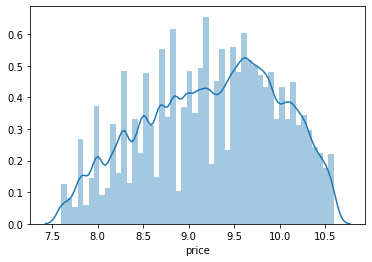

In [11]:
sns.distplot(modelling.price)

### 80-20 Splitting 

In [12]:
y=modelling["price"]
x=modelling.drop('price',axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

### Normalization

In [13]:
x_odomin=x_train["odometer"].min()
x_odomax=x_train["odometer"].max()
x_train["odometer"]=((x_train["odometer"]-x_odomin)/(x_odomax-x_odomin))

x_test["odometer"]=((x_test["odometer"]-x_odomin)/(x_odomax-x_odomin))

x_yearmin=x_train["year"].min()
x_yearmax=x_train["year"].max()
x_train["year"]=((x_train["year"]-x_yearmin)/(x_yearmax-x_yearmin))
x_test["year"]=((x_test["year"]-x_yearmin)/(x_yearmax-x_yearmin))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

### Ordinal Encoding -Condition

In [14]:
condition_dict={"salvage":0,"fair":1,"good":2,"excellent":3,"like new":4}
x_train["condition"]=x_train.condition.map(condition_dict)
x_test["condition"]=x_test.condition.map(condition_dict)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
x_train["cylinders"].value_counts()

6     201107
4      64043
8      62270
5       1866
10      1202
3        359
12        70
Name: cylinders, dtype: int64

In [16]:
cylinder_dict={3:0,4:1,5:2,6:3,8:4,10:5,12:6}
x_train["cylinders"]=x_train.cylinders.map(cylinder_dict)
x_test["cylinders"]=x_test.cylinders.map(cylinder_dict)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
x_train["cylinders"].value_counts()

3    201107
1     64043
4     62270
2      1866
5      1202
0       359
6        70
Name: cylinders, dtype: int64

In [18]:
x_cylmin=x_train["cylinders"].min()
x_cylmax=x_train["cylinders"].max()
x_train["cylinders"]=((x_train["cylinders"]-x_cylmin)/(x_cylmax-x_cylmin))
x_test["cylinders"]=((x_test["cylinders"]-x_cylmin)/(x_cylmax-x_cylmin))

x_conmin=x_train["condition"].min()
x_conmax=x_train["condition"].max()
x_train["condition"]=((x_train["condition"]-x_conmin)/(x_conmax-x_conmin))
x_test["condition"]=((x_test["condition"]-x_conmin)/(x_conmax-x_conmin))


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [19]:
x_train

,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
301757,0.900000,chevrolet,0.75,0.166667,gas,0.208972,clean,automatic,2wd,sedan,brown,northeast
1334,0.783333,volvo,0.50,0.500000,gas,0.478862,clean,automatic,2wd,sedan,silver,northeast
276948,0.933333,chevrolet,0.25,0.500000,gas,0.489253,clean,automatic,4wd,truck,white,south
344251,0.716667,ford,0.00,0.500000,diesel,0.592654,clean,automatic,4wd,pickup,blue,west
403805,0.850000,honda,0.75,0.500000,gas,0.310706,clean,automatic,4wd,sedan,white,south
...,...,...,...,...,...,...,...,...,...,...,...,...
259178,0.866667,chevrolet,1.00,0.500000,gas,0.086893,clean,automatic,2wd,coupe,orange,west
365838,0.783333,mercedes-benz,0.75,0.500000,gas,0.492276,clean,automatic,4wd,sedan,black,northeast
131932,0.766667,chevrolet,0.75,0.666667,gas,0.547425,clean,automatic,4wd,truck,grey,south
146867,0.783333,chevrolet,0.75,0.666667,diesel,0.873332,clean,automatic,2wd,pickup,red,south


### One Hot Encoding

In [20]:
x_train=pd.get_dummies(x_train)
x_test=pd.get_dummies(x_test)

missing_cols=set(x_train.columns)-set(x_test.columns)
for val in missing_cols:
    x_test[val]=0
    
x_test=x_test[x_train.columns]

In [21]:
x_train

,year,condition,cylinders,odometer,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,...,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_white,paint_color_yellow,state_midwest,state_northeast,state_south,state_west
301757,0.900000,0.75,0.166667,0.208972,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1334,0.783333,0.50,0.500000,0.478862,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
276948,0.933333,0.25,0.500000,0.489253,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
344251,0.716667,0.00,0.500000,0.592654,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
403805,0.850000,0.75,0.500000,0.310706,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,0.866667,1.00,0.500000,0.086893,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
365838,0.783333,0.75,0.500000,0.492276,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
131932,0.766667,0.75,0.666667,0.547425,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
146867,0.783333,0.75,0.666667,0.873332,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [22]:
#x_train.to_csv("x_train.csv",index=False)
#x_test.to_csv("x_test.csv",index=False)
#y_train.to_csv("y_train.csv",index=False)
#y_test.to_csv("y_test.csv",index=False)

### Metrics Selection

In [80]:
# storing the model metrics (r2, rmse) for further anaysis and comparing the model
acc_train_r2 = []
acc_test_r2 = []
acc_train_rmse = []
acc_test_rmse = []

### Modelling

### Gradient Boosting

In [24]:
def train_GB(est,max_depth,lr):
    params={'n_estimators': est, 'max_depth': max_depth,'learning_rate': lr}
    gb=ensemble.GradientBoostingRegressor(**params)
    gb_model=gb.fit(x_train,y_train)
    y_pred=gb_model.predict(x_test)
    ybar=np.sum(y_test)/len(y_test)
    sse = np.sum((y_test-y_pred)**2)  
    sst = np.sum((y_test - ybar)**2) 
    rsq=1-(sse/sst)
    print("{}---> NEstimators{}-MaxDepth{}-LearningRate{}".format(rsq,est,max_depth,lr))

In [25]:
for n_est in range(450,550,50):
    for max_depth in range(7,9,1):
        for lr in [0.05,0.1]:
            train_GB(n_est,max_depth,lr)

0.8092529322840317---> NEstimators450-MaxDepth7-LearningRate0.05
0.8207360990590165---> NEstimators450-MaxDepth7-LearningRate0.1
0.816711536361173---> NEstimators450-MaxDepth8-LearningRate0.05
0.8273520458807018---> NEstimators450-MaxDepth8-LearningRate0.1
0.8108780709352013---> NEstimators500-MaxDepth7-LearningRate0.05
0.8221776016721983---> NEstimators500-MaxDepth7-LearningRate0.1
0.8185114459677675---> NEstimators500-MaxDepth8-LearningRate0.05
0.8288798612708208---> NEstimators500-MaxDepth8-LearningRate0.1


In [26]:
params={'n_estimators': 500, 'max_depth': 8,'learning_rate': 0.1}
gb=ensemble.GradientBoostingRegressor(**params)
gb_model=gb.fit(x_train,y_train)

In [27]:
features=pd.DataFrame(gb_model.feature_importances_,index=x_train.columns)
features["columns"]=features.index
features.index=range(0,len(features))
features.columns=["value","columns"]

print("Feature Importances")
importances = []
feature_list=[]
categorical_columns=['manufacturer','fuel','title_status','transmission','drive','type','paint_color','state']
for val in categorical_columns:
    p=(features[features["columns"].str.startswith(val)]["value"].sum())/len(features[features["columns"].str.startswith(val)]["value"])
    print("{}>>{}".format(val,p))
    importances.append(p)
    feature_list.append(val)

for index,row in features.iterrows():
    if(row["columns"]=="odometer"):
        print("Odometer>>{}".format(row["value"]))
        importances.append(row["value"])
        feature_list.append("odometer")
    if(row["columns"]=="year"):
        print("Year>>{}".format(row["value"]))
        importances.append(row["value"])
        feature_list.append("year")
    if(row["columns"]=="cylinders"):
        print("Cylinders>>{}".format(row["value"]))
        importances.append(row["value"])
        feature_list.append("cylinders")
    if(row["columns"]=="condition"):
        print("Condition>>{}".format(row["value"]))
        importances.append(row["value"])
        feature_list.append("condition")

Feature Importances
manufacturer>>0.0012660307000198529
fuel>>0.016003921848824106
title_status>>0.0021027656267992765
transmission>>0.0017003056076721687
drive>>0.004369806081954241
type>>0.00605464144306396
paint_color>>0.0004606464668676538
state>>0.0027901451614326367
Year>>0.5309603546775253
Condition>>0.014666056723569042
Cylinders>>0.08563466218260139
Odometer>>0.10125326986821646


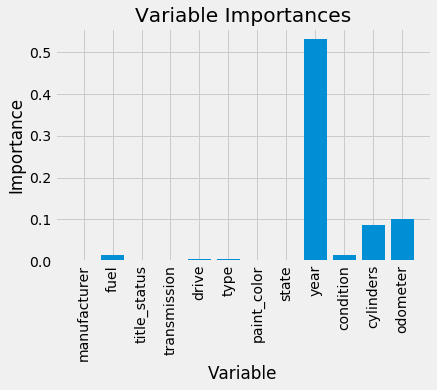

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [29]:
y_pred=gb_model.predict(x_test)
mse = mean_squared_error(y_test,y_pred)
rmse=sqrt(mse)
rmse
print("rmse (Test)={}".format(rmse))

acc_test_rmse.insert(0,rmse)
ybar=np.sum(y_test)/len(y_test)
sse = np.sum((y_test-y_pred)**2)  
sst = np.sum((y_test - ybar)**2) 
rsq=1-(sse/sst)
print("r2 (Test)={}".format(rsq))
acc_test_r2.insert(0,rsq)

rmse (Test)=0.30273570188345894
r2 (Test)=0.8288649943613691


In [30]:
y_predtr=gb_model.predict(x_train)

mse = mean_squared_error(y_train,y_predtr)
rmse=sqrt(mse)
rmse
print("rmse (Train)={}".format(rmse))
acc_train_rmse.insert(0,rmse)
ybar=np.sum(y_train)/len(y_train)
sse = np.sum((y_train-y_predtr)**2)  
sst = np.sum((y_train - ybar)**2) 
rsq=1-(sse/sst)
print("r2 (Train)={}".format(rsq))

acc_train_r2.insert(0,rsq)

rmse (Train)=0.2754188598023748
r2 (Train)=0.8585248593271049


In [31]:
#pickle.dump(gb_model, open('GradBReg.pkl','wb'))
#gb_model=pickle.load(open('GradBReg.pkl', 'rb'))

### Random Forest

In [32]:
from sklearn.ensemble import RandomForestRegressor
def train_RF(est):
    regressor = RandomForestRegressor(n_estimators=est,random_state=0,n_jobs=-1)
    regressor.fit(x_train,y_train)
    print('{}>>>>>N Estimators-{}'.format(regressor.score(x_test, y_test),est))
    
for est in range(350,550,50):
    train_RF(est)

0.8500994886849162>>>>>N Estimators-350
0.8501604547156063>>>>>N Estimators-400
0.8501995623326741>>>>>N Estimators-450
0.8502348127281153>>>>>N Estimators-500


In [33]:
regressor = RandomForestRegressor(n_estimators=500, random_state=0,n_jobs=-1)
regressor.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=-1, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [34]:
features=pd.DataFrame(regressor.feature_importances_,index=x_train.columns)
features["columns"]=features.index
features.index=range(0,len(features))
features.columns=["value","columns"]

print("Feature Importances")
importances = []
feature_list=[]
categorical_columns=['manufacturer','fuel','title_status','transmission','drive','type','paint_color','state']
for val in categorical_columns:
    p=(features[features["columns"].str.startswith(val)]["value"].sum())/len(features[features["columns"].str.startswith(val)]["value"])
    print("{}>>{}".format(val,p))
    importances.append(p)
    feature_list.append(val)

for index,row in features.iterrows():
    if(row["columns"]=="odometer"):
        print("Odometer>>{}".format(row["value"]))
        importances.append(row["value"])
        feature_list.append("odometer")
    if(row["columns"]=="year"):
        print("Year>>{}".format(row["value"]))
        importances.append(row["value"])
        feature_list.append("year")
    if(row["columns"]=="cylinders"):
        print("Cylinders>>{}".format(row["value"]))
        importances.append(row["value"])
        feature_list.append("cylinders")
    if(row["columns"]=="condition"):
        print("Condition>>{}".format(row["value"]))
        importances.append(row["value"])
        feature_list.append("condition")

Feature Importances
manufacturer>>0.0018091284361750574
fuel>>0.013667627585434623
title_status>>0.002291018228181505
transmission>>0.002570892847682676
drive>>0.003574416695188176
type>>0.005710921737854474
paint_color>>0.0021615295256521908
state>>0.005828211836896983
Year>>0.47216448921659326
Condition>>0.019108417832917064
Cylinders>>0.07728242357750649
Odometer>>0.12578859104403878


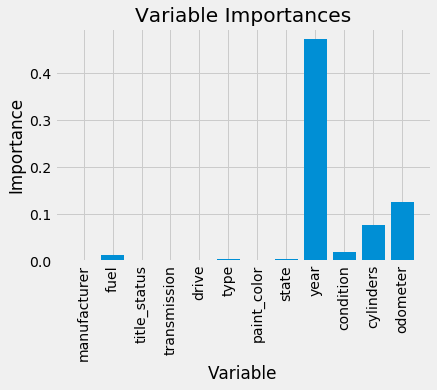

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [36]:
y_pred_test = regressor.predict(x_test)
y_pred_train = regressor.predict(x_train)

# Metrics
from sklearn import metrics

print('rmse (Test):', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))
print("r2 (Test):{}".format(regressor.score(x_test, y_test)))

print('rmse (Train):', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print("r2 (Train):{}".format(regressor.score(x_train, y_train)))

acc_train_rmse.insert(1, np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
acc_test_rmse.insert(1, np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))
acc_test_r2.insert(1,regressor.score(x_test, y_test))
acc_train_r2.insert(1,regressor.score(x_train, y_train))

rmse (Test): 0.2832041746470592
r2 (Test):0.8502348127281153
rmse (Train): 0.1371690630102667
r2 (Train):0.9649082419438797


In [83]:
#pickle.dump(regressor, open('RandomFReg.pkl','wb'))
#regressor=pickle.load(open('RandomFReg.pkl', 'rb'))

### Ridge

In [38]:
import sklearn.model_selection as GridSearchCV
from sklearn.linear_model import Ridge

ridge=Ridge()
parameters= {'alpha':[x for x in range(1,101)]}

ridge_reg=ms.GridSearchCV(ridge, param_grid=parameters, scoring='neg_mean_squared_error', cv=15)
ridge_reg.fit(x_train,y_train)
print("The best value of Alpha is: ",ridge_reg.best_params_)

The best value of Alpha is:  {'alpha': 1}


In [39]:
from sklearn.linear_model import Ridge
ridge_mod=Ridge(alpha=1)
ridge_mod.fit(x_train,y_train)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [40]:
y_pred_train_ridge=ridge_mod.predict(x_train)
y_pred_test_ridge=ridge_mod.predict(x_test)

print('rmse (Test) = ' + str(math.sqrt(sklm.mean_squared_error(y_test, y_pred_test_ridge)))) 
print("r2 (Test):{}".format(ridge_mod.score(x_test, y_test)))
print('rmse (Train) = ' + str(math.sqrt(sklm.mean_squared_error(y_train, y_pred_train_ridge))))
print("r2 (Train):{}".format(ridge_mod.score(x_train, y_train)))

rmse (Test) = 0.4335325696890911
r2 (Test):0.6490420925029677
rmse (Train) = 0.4305915513560154
r2 (Train):0.6542009539081212


In [41]:
acc_train_rmse.insert(2, math.sqrt(sklm.mean_squared_error(y_train, y_pred_train_ridge)))
acc_test_rmse.insert(2, math.sqrt(sklm.mean_squared_error(y_test, y_pred_test_ridge)))
acc_test_r2.insert(2,ridge_mod.score(x_test, y_test))
acc_train_r2.insert(2,ridge_mod.score(x_train, y_train))

In [42]:
#pickle.dump(ridge_mod, open('RidgeReg.pkl','wb'))

### Lasso

In [43]:
from sklearn.linear_model import Lasso
parameters= {'alpha':[1e-8,0.0001,0.0009,0.001,0.002,0.003,0.01,0.1,1,10,100]}
lasso=Lasso()
lasso_reg=ms.GridSearchCV(lasso, param_grid=parameters, scoring='neg_mean_squared_error', cv=15)
lasso_reg.fit(x_train,y_train)
print('The best value of Alpha is: ',lasso_reg.best_params_)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6639.003702260219, tolerance: 16.565548711343745
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6637.244678750161, tolerance: 16.569791276616424
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6625.531320993701, tolerance: 16.55823379906485
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6612.47689

The best value of Alpha is:  {'alpha': 1e-08}


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7092.086698821655, tolerance: 17.74296909614564
  positive)


In [44]:
from sklearn.linear_model import Lasso
lasso_mod=Lasso(alpha=1e-8)
lasso_mod.fit(x_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7092.086698821655, tolerance: 17.74296909614564
  positive)


Lasso(alpha=1e-08, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [45]:
y_lasso_train=lasso_mod.predict(x_train)
y_lasso_test=lasso_mod.predict(x_test)

print('rmse (Test): ' + str(math.sqrt(sklm.mean_squared_error(y_test, y_lasso_test))))
print("r2 (Test):{}".format(lasso_mod.score(x_test, y_test)))
print('rmse (Train): ' + str(math.sqrt(sklm.mean_squared_error(y_train, y_lasso_train))))
print("r2 (Train):{}".format(lasso_mod.score(x_train, y_train)))

rmse (Test): 0.4335341223548044
r2 (Test):0.6490395786374653
rmse (Train): 0.4305865700995712
r2 (Train):0.6542089545470466


In [46]:
acc_train_rmse.insert(3, math.sqrt(sklm.mean_squared_error(y_train, y_lasso_train)))
acc_test_rmse.insert(3, math.sqrt(sklm.mean_squared_error(y_test, y_lasso_test)))
acc_test_r2.insert(3,lasso_mod.score(x_test, y_test))
acc_train_r2.insert(3,lasso_mod.score(x_train, y_train))

In [47]:
#pickle.dump(lasso_mod, open('LassoReg.pkl','wb'))

### Bagging Regressor

In [48]:
from sklearn.ensemble import BaggingRegressor
# train the bagging regressor model
bagging = BaggingRegressor()
bag_mod = bagging.fit(x_train,y_train)

In [49]:
bag_test = bag_mod.predict(x_test)
bag_train = bag_mod.predict(x_train)

print('rmse (Test):' + str(math.sqrt(sklm.mean_squared_error(y_test, bag_test))))
print("r2 (Test):{}".format(bag_mod.score(x_test, y_test)))
print('rmse (Train): ' + str(math.sqrt(sklm.mean_squared_error(y_train, bag_train))))
print("r2 (Train):{}".format(bag_mod.score(x_train, y_train)))

rmse (Test):0.2940810046003759
r2 (Test):0.8385100430842275
rmse (Train): 0.15144645079966337
r2 (Train):0.9572229351367784


In [50]:
acc_train_rmse.insert(4, math.sqrt(sklm.mean_squared_error(y_train, bag_train)))
acc_test_rmse.insert(4, math.sqrt(sklm.mean_squared_error(y_test, bag_test)))
acc_test_r2.insert(4,bag_mod.score(x_test, y_test))
acc_train_r2.insert(4,bag_mod.score(x_train, y_train))

In [51]:
#pickle.dump(bag_mod, open('BagReg.pkl','wb'))

### Averaging the Regressors

In [54]:
# Averaging the regressor models

#GradientBoosting Regressor 
gb_test = gb_model.predict(x_test)
gb_train = gb_model.predict(x_train)

#RandomForest Regressor 
rf_test = regressor.predict(x_test)
rf_train = regressor.predict(x_train)

#Bagging Regressor 
bag_test = bag_mod.predict(x_test)
bag_train = bag_mod.predict(x_train)

In [55]:
final_test=(0.4*rf_test+0.3*gb_test+0.3*bag_test )
final_train = (0.4*rf_train+0.3*gb_train +0.3*bag_train)
print('rmse (Test):' + str(math.sqrt(sklm.mean_squared_error(y_test, final_test))))
acc_test_rmse.insert(5,math.sqrt(sklm.mean_squared_error(y_test, final_test)))
ybar=np.sum(y_test)/len(y_test)
sse = np.sum((y_test-final_test)**2)  
sst = np.sum((y_test - ybar)**2) 
rsq_test=1-(sse/sst)
print("r2 (Test)={}".format(rsq_test))
acc_test_r2.insert(5,rsq_test)

print('rmse (Train):' + str(math.sqrt(sklm.mean_squared_error(y_train, final_train))))
acc_train_rmse.insert(5,math.sqrt(sklm.mean_squared_error(y_train, final_train)))
ybar=np.sum(y_train)/len(y_train)
sse = np.sum((y_train-final_train)**2)  
sst = np.sum((y_train - ybar)**2) 
rsq_train=1-(sse/sst)
print("r2 (Train):{}".format(rsq_train))
acc_train_r2.insert(5,rsq_train)

rmse (Test):0.27892300351594695
r2 (Test)=0.8547285610311268
rmse (Train):0.16850743780029537
r2 (Train):0.9470420783753455


### Model Evaluation

In [100]:
acc_test_rmse =[0.30273570188345894,
0.2832041746470592,
0.4335325696890911,
0.4335341223548044,
0.2940810046003759,
0.27892300351594695]

acc_test_r2 =[0.8288649943613691,
0.8502348127281153,
0.6490420925029677,
0.6490395786374653,
0.8385100430842275,
0.8547285610311268]

acc_train_rmse =[0.2754188598023748,
0.1371690630102667,
0.4305915513560154,
0.4305865700995712,
0.15144645079966337,
0.16850743780029537]

acc_train_r2 =[0.8585248593271049,
0.9649082419438797,
0.6542009539081212,
0.6542089545470466,
0.9572229351367784,
0.9470420783753455]

In [101]:
models = pd.DataFrame({
    'Model': ['Gradient Boosting', 'Random Forest', 
              'Ridge','Lasso', 'BaggingRegressor', 
              'Averaging the Regressors'],
    
    'r2_train': acc_train_r2,
    'r2_test': acc_test_r2,
    'rmse_train': acc_train_rmse,
    'rmse_test': acc_test_rmse
                     })

In [102]:
pd.options.display.float_format = '{:,.2f}'.format

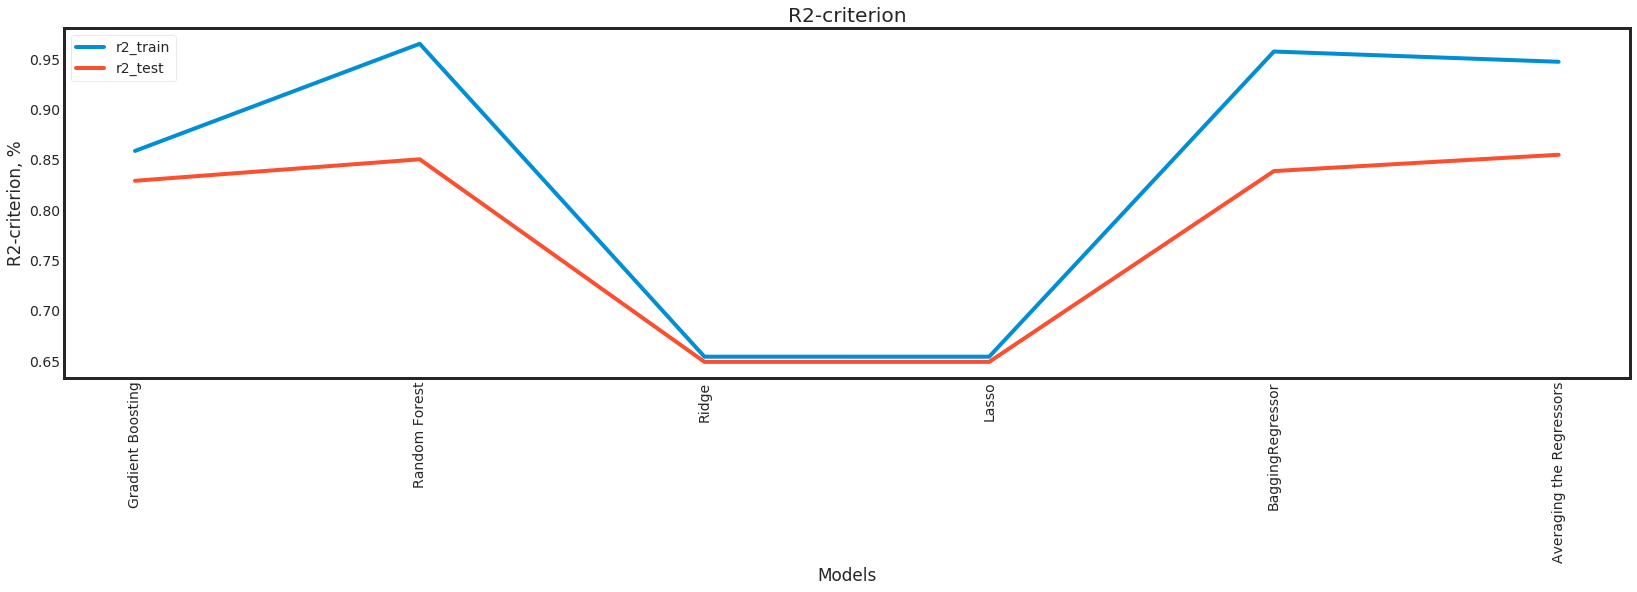

In [103]:
plt.figure(figsize=[25,6])
xx = models['Model']
plt.tick_params(labelsize=14)
plt.plot(xx, models['r2_train'], label = 'r2_train')
plt.plot(xx, models['r2_test'], label = 'r2_test')
plt.legend()
plt.title('R2-criterion')
plt.xlabel('Models')
plt.ylabel('R2-criterion, %')
plt.xticks(xx, rotation='vertical')
plt.savefig('graph.png')
plt.show()

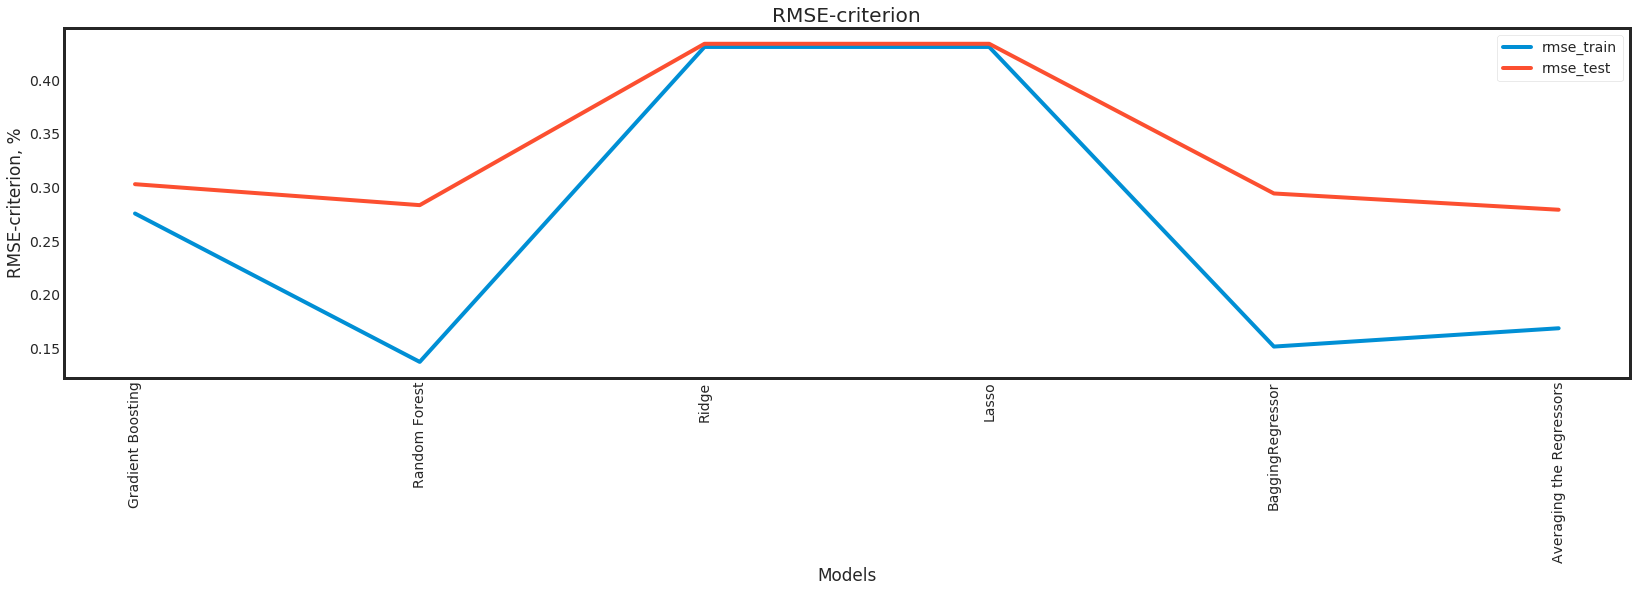

In [104]:
plt.figure(figsize=[25,6])
xx = models['Model']
plt.tick_params(labelsize=14)
plt.plot(xx, models['rmse_train'], label = 'rmse_train')
plt.plot(xx, models['rmse_test'], label = 'rmse_test')
plt.legend()
plt.title('RMSE-criterion')
plt.xlabel('Models')
plt.ylabel('RMSE-criterion, %')
plt.xticks(xx, rotation='vertical')
plt.savefig('graph.png')
plt.show()

In [105]:
rmse_test_scores = models[['Model','rmse_test']].set_index('Model')['rmse_test'].to_dict()
rmse_train_scores = models[['Model','rmse_train']].set_index('Model')['rmse_train'].to_dict()

r2_train_scores = models[['Model','r2_train']].set_index('Model')['r2_train'].to_dict()
r2_test_scores = models[['Model','r2_test']].set_index('Model')['r2_test'].to_dict()

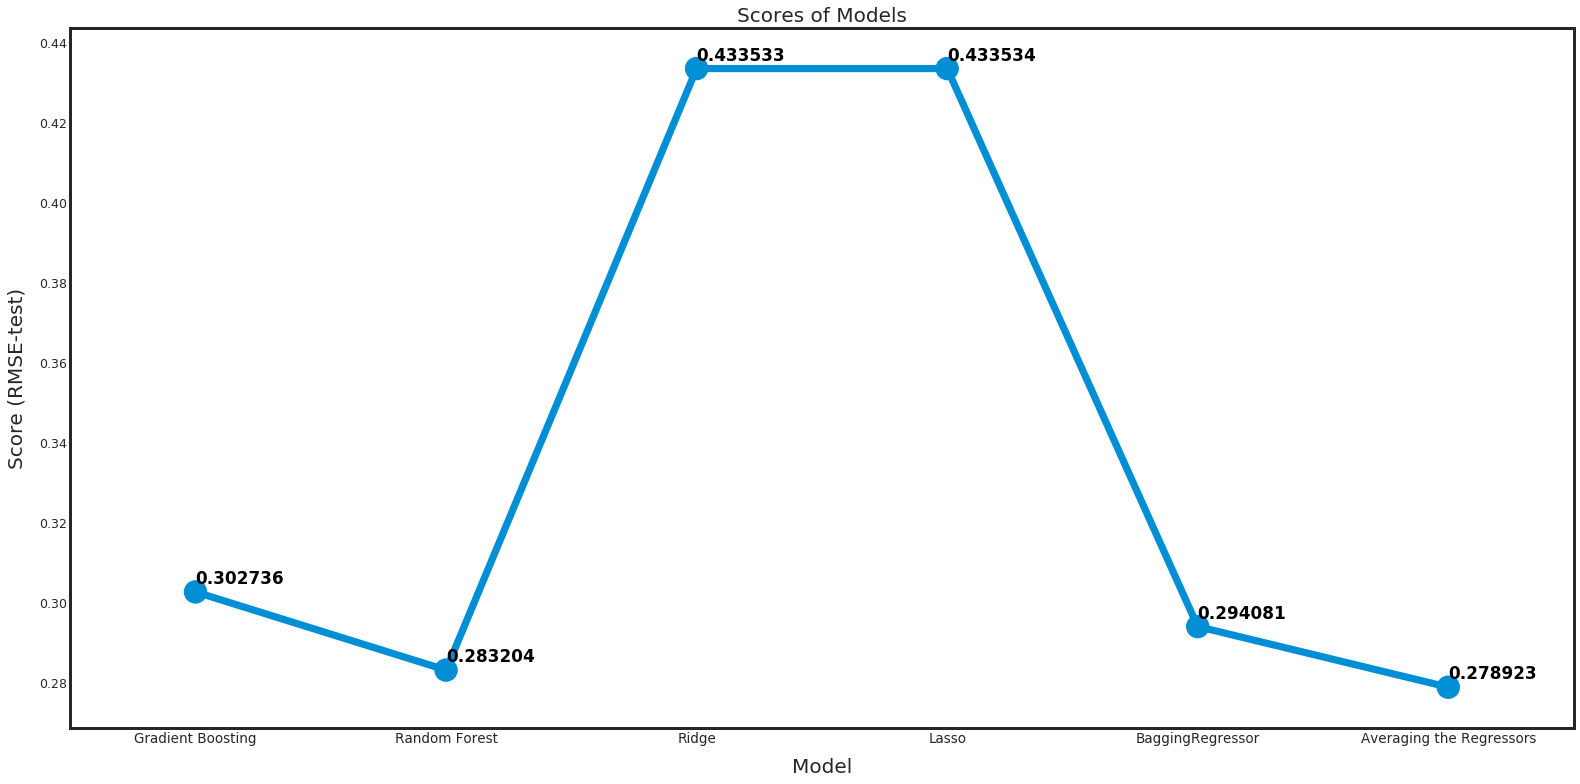

In [106]:
for a,b in zip(rmse_test_scores.keys(),rmse_test_scores.values()):
    rmse_test_scores[a] = (b,0)

# Plot the predictions for each model
sns.set_style("white")
fig = plt.figure(figsize=(24, 12))

ax = sns.pointplot(x=list(rmse_test_scores.keys()), y=[score for score, _ in rmse_test_scores.values()], markers=['o'], linestyles=['-'])
for i, score in enumerate(rmse_test_scores.values()):
    ax.text(i, score[0] + 0.002, '{:.6f}'.format(score[0]), horizontalalignment='left', size='large', color='black', weight='semibold')

plt.ylabel('Score (RMSE-test)', size=20, labelpad=12.5)
plt.xlabel('Model', size=20, labelpad=12.5)
plt.tick_params(axis='x', labelsize=13.5)
plt.tick_params(axis='y', labelsize=12.5)

plt.title('Scores of Models', size=20)

plt.show()


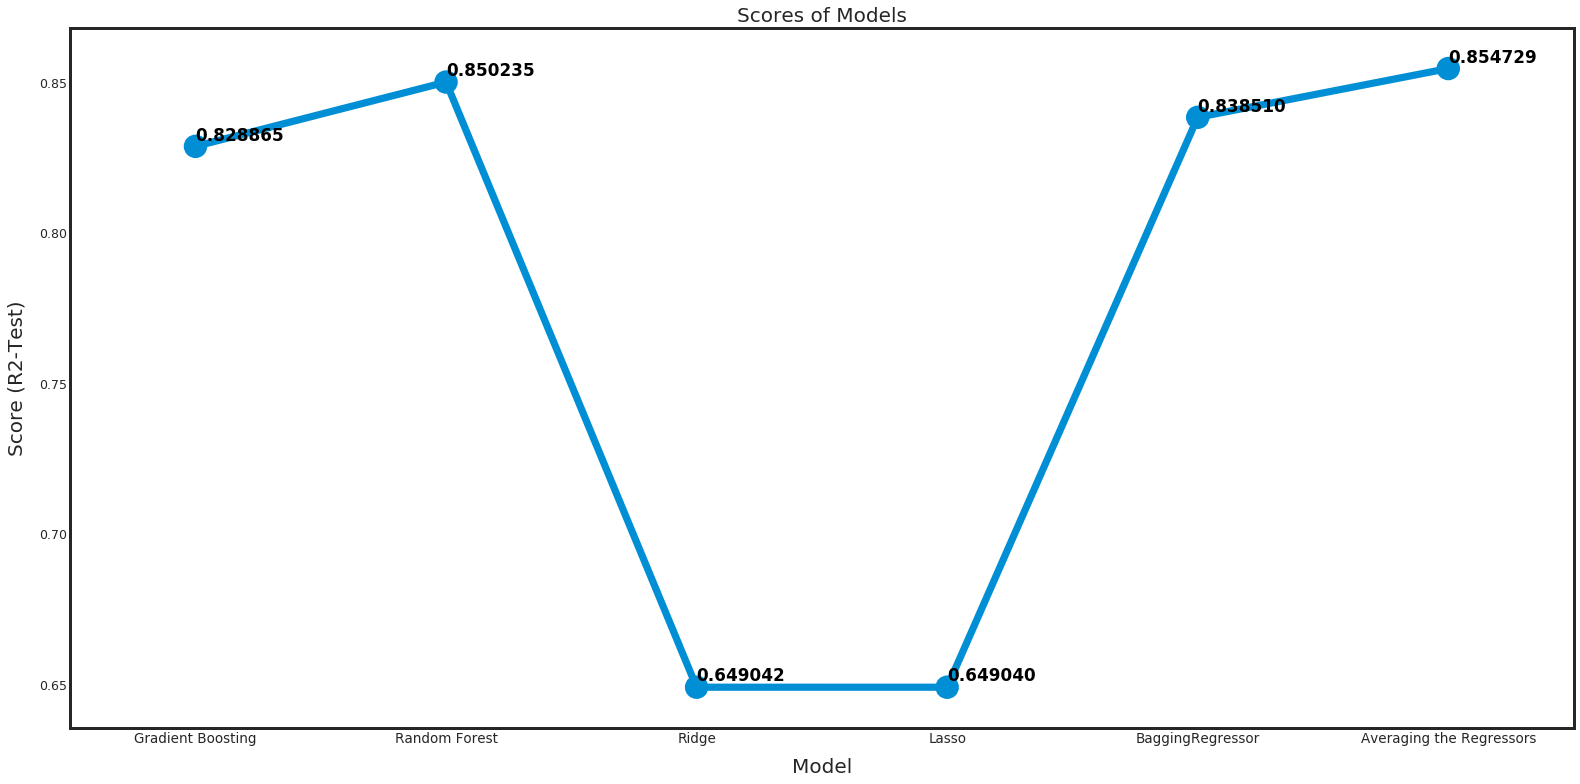

In [108]:
for a,b in zip(r2_test_scores.keys(),r2_test_scores.values()):
    r2_test_scores[a] = (b,0)

# Plot the predictions for each model
sns.set_style("white")
fig = plt.figure(figsize=(24, 12))

ax = sns.pointplot(x=list(r2_test_scores.keys()), y=[score for score, _ in r2_test_scores.values()], markers=['o'], linestyles=['-'])
for i, score in enumerate(r2_test_scores.values()):
    ax.text(i, score[0] + 0.002, '{:.6f}'.format(score[0]), horizontalalignment='left', size='large', color='black', weight='semibold')

plt.ylabel('Score (R2-Test)', size=20, labelpad=12.5)
plt.xlabel('Model', size=20, labelpad=12.5)
plt.tick_params(axis='x', labelsize=13.5)
plt.tick_params(axis='y', labelsize=12.5)

plt.title('Scores of Models', size=20)

plt.show()

### End